In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform
import seaborn as sns

In [74]:
# Grab data from .txt file

with open('data3.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)

df.head()

,0,1
0,0.731106,0.273981
1,0.457478,0.694600
2,0.892065,0.950799
3,0.543157,0.108363
4,0.728740,0.238795


In [75]:
df.describe()

,0,1
count,28.000000,28.000000
mean,0.673204,0.514042
std,0.161728,0.337860
min,0.457478,0.108363
25%,0.517074,0.219832
50%,0.653519,0.473043
75%,0.790829,0.773269
max,0.935640,0.994055


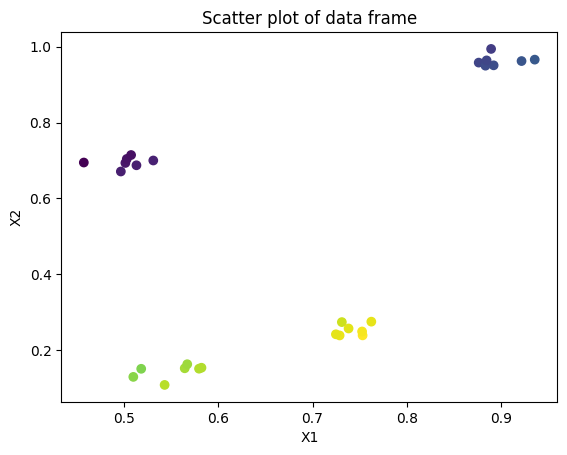

In [76]:
plt.scatter(df[0], df[1], c = df[0] - df[1], cmap = 'viridis')
plt.title('Scatter plot of data frame')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

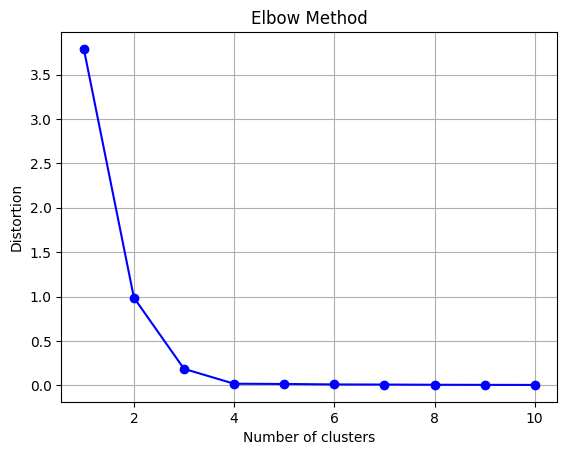

In [77]:
distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1212)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 11), distortions, marker = 'o', c = 'b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [78]:
num_clusters = 4

columns = ['nearest neighbor', 'far neighbor', 'median relationship']
index = ['Euclidean', 'standardized Euclidean', 'Minkowski']
df_metrics = pd.DataFrame(index = index, columns = columns)
df_metrics

,nearest neighbor,far neighbor,median relationship
Euclidean,NaN,NaN,NaN
standardized Euclidean,NaN,NaN,NaN
Minkowski,NaN,NaN,NaN


In [79]:
# single == nearest neighbor
# complete == far neighbor
# median == median relationship

In [80]:
DEuclidean = np.linalg.norm(df.values[:, None] - df.values, axis = 2)

for method, col in zip(['single', 'complete', 'median'], columns):
    Euclidean = linkage(squareform(DEuclidean), method = method)
    c, _ = cophenet(Euclidean, squareform(DEuclidean))
    df_metrics.loc['Euclidean', col] = c


print(df_metrics)

                       nearest neighbor far neighbor median relationship
Euclidean                      0.906017     0.915075            0.918019
standardized Euclidean              NaN          NaN                 NaN
Minkowski                           NaN          NaN                 NaN


In [81]:
df_standardized = (df - df.mean()) / df.std()
DEuclidean_std = np.linalg.norm(df_standardized.values[:, None] - df_standardized.values, axis = 2)

for method, col in zip(['single', 'complete', 'median'], columns):
    Euclidean_std = linkage(squareform(DEuclidean_std), method = method)
    c, _ = cophenet(Euclidean_std, squareform(DEuclidean_std))
    df_metrics.loc['standardized Euclidean', col] = c


print(df_metrics)

                       nearest neighbor far neighbor median relationship
Euclidean                      0.906017     0.915075            0.918019
standardized Euclidean         0.958043      0.95878                0.96
Minkowski                           NaN          NaN                 NaN


In [82]:
Dminkowski = cdist(df.values, df.values, 'minkowski', p = 4)

for method, col in zip(['single', 'complete', 'median'], columns):
    Minkowski = linkage(squareform(Dminkowski), method = method)
    c, _ = cophenet(Minkowski, squareform(Dminkowski))
    df_metrics.loc['Minkowski', col] = c


print(df_metrics)

                       nearest neighbor far neighbor median relationship
Euclidean                      0.906017     0.915075            0.918019
standardized Euclidean         0.958043      0.95878                0.96
Minkowski                      0.902852     0.918946            0.920025


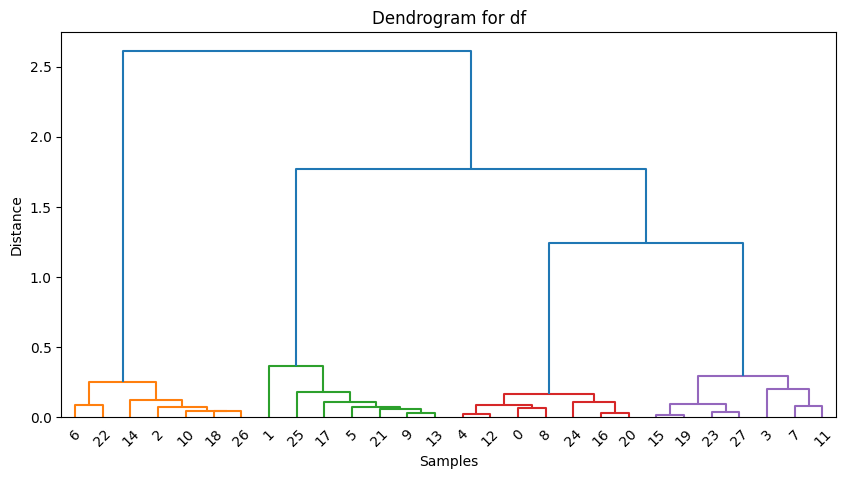

In [83]:
Euclidean_std = linkage(squareform(DEuclidean_std), method = 'median')
c, _ = cophenet(Euclidean_std, squareform(DEuclidean_std))
df_metrics.loc['standardized Euclidean', col] = c

plt.figure(figsize = (10, 5))
dendrogram(Euclidean_std, color_threshold = 1)
plt.title('Dendrogram for df')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [84]:
threshold = 1
clusters = fcluster(Euclidean_std, threshold, criterion = 'distance')

num_clusters = len(np.unique(clusters))
print("Num clusters:", num_clusters)
print("Num elements in cluster:", dict(zip(*np.unique(clusters, return_counts = True))))


Num clusters: 4
Num elements in cluster: {1: 7, 2: 7, 3: 7, 4: 7}


In [85]:
cluster_centers = []

print('Cluster centers:')
for i in range(1, num_clusters + 1):
    cluster_centers.append(np.mean(df[clusters == i], axis = 0))
    print(cluster_centers[i - 1])

Cluster centers:
0    0.897570
1    0.963497
dtype: float64
0    0.501548
1    0.694972
dtype: float64
0    0.741557
1    0.253587
dtype: float64
0    0.55214
1    0.14411
dtype: float64


In [86]:
cluster_variances = []

print("Cluster variances:")
for i, center in enumerate(cluster_centers):
    cluster_data = df[clusters == (i + 1)]
    distances = np.linalg.norm(cluster_data - center, axis = 1)
    cluster_variances.append(np.mean(distances ** 2))
    print(cluster_variances[i])

Cluster variances:
0.0006098092127043224
0.0005913970085280015
0.000390737521553098
0.0010201222858021142


In [103]:
for i in range(1, num_clusters + 1):
    print(f"Cluster {i}:")
    print(df[clusters == i].describe(), "\n\n")

Cluster 1:
              0         1
count  7.000000  7.000000
mean   0.897570  0.963497
std    0.022175  0.014823
min    0.876230  0.949873
25%    0.884017  0.954400
50%    0.889371  0.962093
75%    0.906858  0.964827
max    0.935640  0.994055 

Cluster 2:
              0         1
count  7.000000  7.000000
mean   0.501548  0.694972
std    0.022428  0.013672
min    0.457478  0.670957
25%    0.499137  0.690425
50%    0.503035  0.694600
75%    0.510451  0.701999
max    0.531144  0.714401 

Cluster 3:
              0         1
count  7.000000  7.000000
mean   0.741557  0.253587
std    0.014450  0.015718
min    0.724797  0.238795
25%    0.729923  0.240403
50%    0.738226  0.249240
75%    0.752835  0.265571
max    0.762362  0.275128 

Cluster 4:
              0         1
count  7.000000  7.000000
mean   0.552140  0.144110
std    0.028992  0.018697
min    0.509960  0.108363
25%    0.530746  0.140206
50%    0.564482  0.151153
75%    0.573402  0.152951
max    0.582241  0.162943 



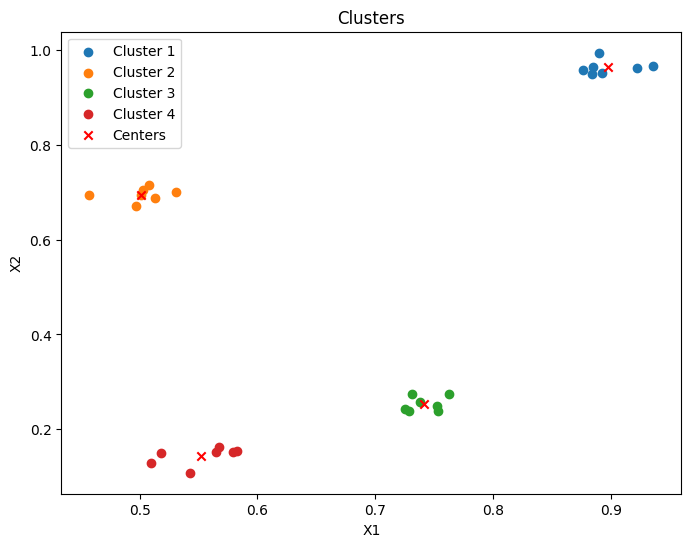

In [88]:
plt.figure(figsize = (8, 6))
for i in range(num_clusters):
    plt.scatter(df.iloc[clusters == (i + 1), 0], df.iloc[clusters == (i + 1), 1], label = f'Cluster {i + 1}')

plt.scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], color = 'r', marker = 'x', label = 'Centers')
plt.title('Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

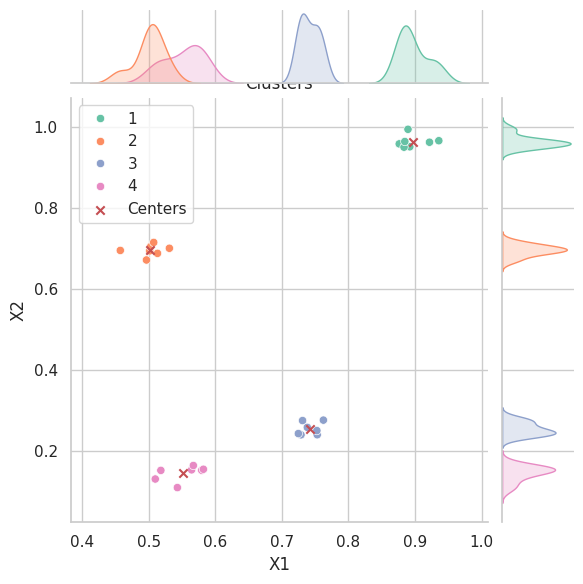

In [99]:
sns.jointplot(x = df.iloc[:, 0], y = df.iloc[:, 1], kind = "scatter", hue = clusters, palette = "Set2", height = 6)

plt.scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], color = 'r', marker = 'x', label = 'Centers')
plt.title('Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

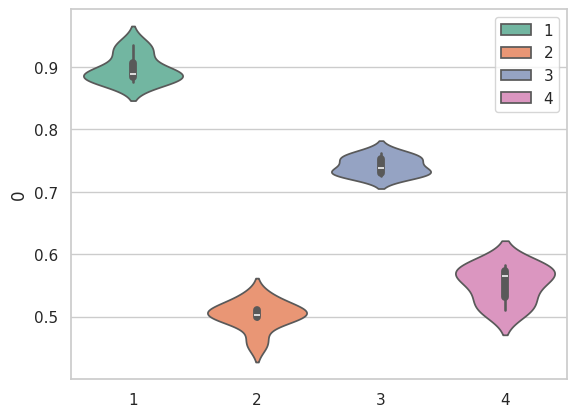

In [102]:
sns.violinplot(x = clusters, y = df.iloc[:, 0], hue = clusters, palette = "Set2")
plt.show()